<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/FourierTransformIntegrand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>The Inegrand of Fourier Transform</h1></b>

Dr. Bingsen Wang

12/9/2023
</center>

#Python Code
The Python code illustrates the integrand of Fourier transform.

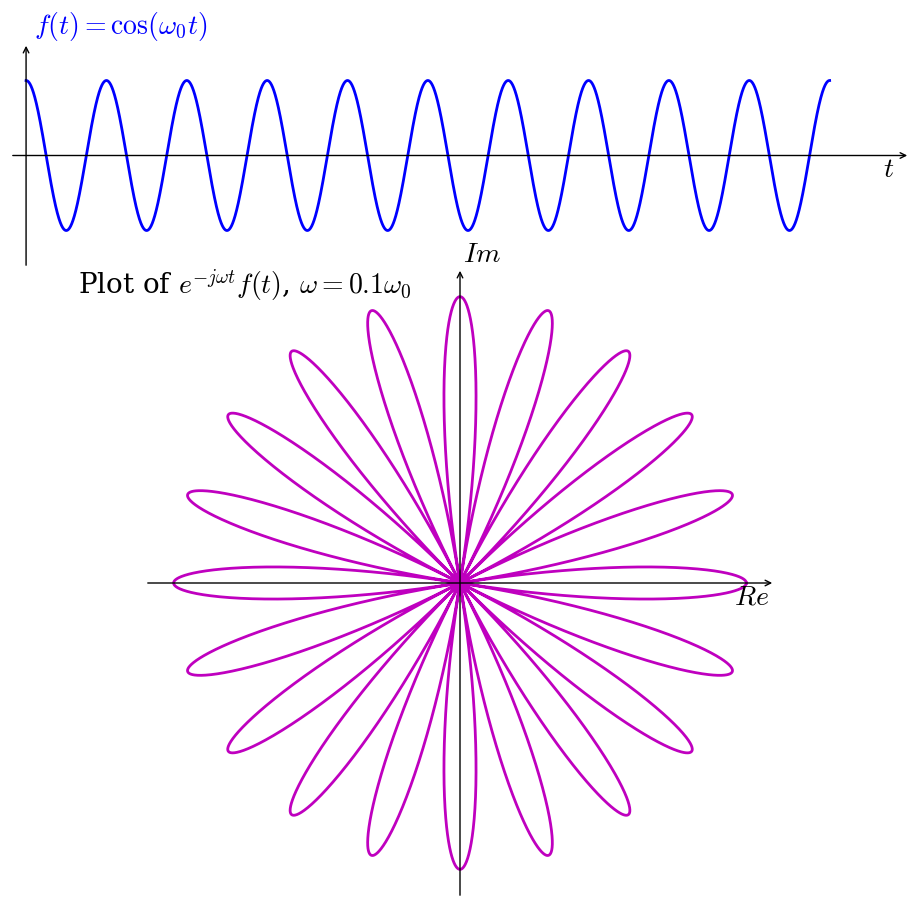

In [18]:
import matplotlib
from os import linesep
from numpy import linspace,cos,pi,sin,random,exp,real, imag
import matplotlib.pyplot as plt
from matplotlib import animation,rc
rc('animation', html='jshtml')
plt.rcParams.update({"font.family" : "serif","mathtext.fontset" : "cm"})

def y(f,t): #cosine function
  return cos(2*pi*f*t)

def fourierIngegrand(f,f0,t): #integrand
  return exp(-1j*2*pi*f*t)*y(f0,t)

#parameters
Nf = 39
t=linspace(0,1,2048*4)
f0=10
omega0=2*pi*f0
yt=y(f0,t)
fr = linspace(0.1,2,Nf)#frequency ratio
fig = plt.figure(figsize=(9,9))
fig.tight_layout()
ax_frame = [[[0, 0.7, 1, .25], [-.02,1.1], [-1.5,1.5]], #signal
            [[.15, 0,   .7, .7], [-1.1,1.1], [-1.1,1.1]], #Fourier transform integrand
            ]# [pos-boundary, xlim, ylim] for subplots
ax_lbl=[[r'$f(t)=\cos(\omega_0 t)$', '$t$'],
        ['$Im$', '$Re$'],
        ] #variables for yx axes of each subplot
clst=['b','m'] #colors of lines
ax_lst=[] #axis list or the list of subplots
line_lst = [] #array containing all the line segments
for k in range(len(ax_frame)):
  xn,xm,yn,ym = ax_frame[k][1]+ax_frame[k][2]
  ax=fig.add_axes(ax_frame[k][0],xlim=[xn,xm], ylim=[yn,ym],fc='none') #no fc
  ax.axis('off') #turn off axis frames
  ax_lst.append(ax)
  ax.annotate("", (xm, 0), (xn, 0),arrowprops={'arrowstyle':"->"}) #x-axis
  ax.annotate("", (0,ym), (0,yn),arrowprops={'arrowstyle':"->"}) #y-axis
  line_lst.append(ax.plot([], [],color=clst[k], lw=2)[0])
  ax.text(xm-.02,0,ax_lbl[k][-1],size=20,va='top',ha='right') #x-axis label
  if k==0:
    y_text=ax.text(0.01,ym,ax_lbl[k][0],color=clst[k],size=20,va='bottom') #y label
  else:
    y_text=ax.text(0.01,ym,ax_lbl[k][0],size=20,va='bottom') #y label
title1= ax_lst[1].text(-0.75,ax_frame[1][2][1],'',va='top',ha='center',size=20)
# animation function. This is called sequentially
def animate(i):
  line_lst[0].set_data(t,yt)
  fti = fourierIngegrand(fr[i]*f0,f0,t)#Fourier transform integrand
  line_lst[1].set_data(real(fti),imag(fti))
  title1.set_text('Plot of $e^{-j\omega t}f(t)$, '+'$\omega ='+str(round(fr[i],2)) +'\omega_0$')
  return

anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=500)
# anim #uncomment to generate animation in the output area
# to save the animation, uncomment the following three lines
fn = r"Fourier_integrand.mp4"
writervideo = animation.FFMpegWriter(fps=2)
anim.save(fn, writer=writervideo,dpi = 120)